In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, export_graphviz

# Decision Tree Classification

In [47]:
iris = load_iris()

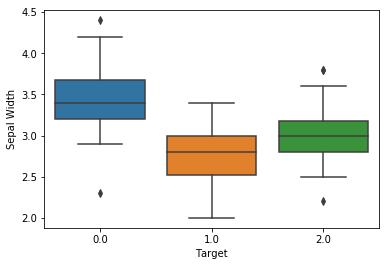

In [44]:
X_whole,y = load_iris(return_X_y=True)#sepal l,w, petal l,w # Setosa,Versicolour,Virginica
iris_df = pd.DataFrame(data = np.concatenate((X_whole,y.reshape(-1,1)),axis =1),columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Target'])
iris_df.head(n=5)
sns.boxplot(x = 'Target',y = 'Sepal Width', data = iris_df)

C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


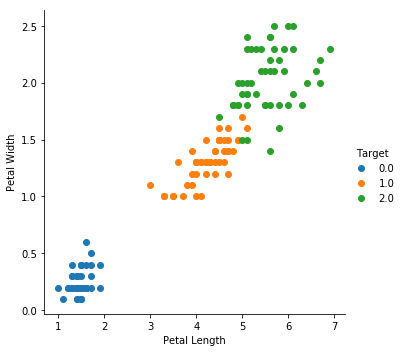

In [41]:
# Plotting conditional relationship
sns.FacetGrid(iris_df,hue = 'Target',size=5).map(plt.scatter,'Petal Length','Petal Width').add_legend()

In [53]:
dt = DecisionTreeClassifier(max_depth=2)
X = X_whole[:,2:]
dt.fit(X,y)
dt_sc = dt.score(X,y)
print ('Training Accuracy = %.2f'%(dt_sc))
yhat = dt.predict([[5,1.5]])
y_prob = dt.predict_proba([[5,1.5]]) # highest prob associated with the 2nd class [ind = 1]
print ('Train Pred Proba = ',y_prob)
print ('yhat = ', yhat)
print ('y',y)

Training Accuracy = 0.96
Train Pred Proba =  [[0.         0.90740741 0.09259259]]
yhat =  [1]
y [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
export_graphviz(dt,feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True)

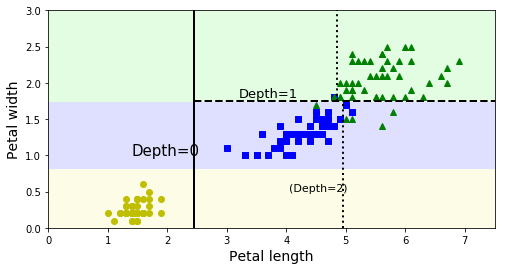

In [50]:
# Decision Boundaries in the presence of two of the four features
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(dt, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

# Decision Tree Regression

In [55]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
dt_reg = DecisionTreeRegressor(max_depth=2,random_state=42)
dt_reg.fit(X,y)
reg_sc = dt_reg.score(X,y)
print ('Regression Score = ',reg_sc)

Regression Score =  0.7966018355059643


In [ ]:
Summary:
    Decision Tree Classifier Goal: 
        ** Build the simplest tree based on hierarchical 
        decisions (based on the features)with the highest performance 
        (leading to the highest training,and prediction accuracies)
        ** Minimizing the Cost Function(J): by the purest nodes(min gini,entropy(max IG))
    Important Take-aways about the alg:
        1. It is highly flexible and could easily fit the training data 
            - Hyperparameter tuning
                - Non-parametric Model(not setting parameters prior to training), with high degree-of-freedom
            - Tree Pruning 
                - Removing not statistically significant nodes
    Decision Tree Regressor Goal:
        ** Building a tree and branching based on attributes,leading to the lowest MSE at each node
    Pros: 
    Cons:
        - Very sensitive to training data

In [ ]:
References:
    https://www.youtube.com/watch?v=eKD5gxPPeY0